In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcc3VwZXJcRG9jdW1lbnRzXEdpdGh1YlxzZXF1b2lhXG5vdGVib29rcw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

C:\Users\super\AppData\Local\Temp\ipykernel_47900\1471565673.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\importlib\\_bootstrap_external.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\zipimport.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\codecs.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\aliases.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\__init__.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\utf_8.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\encodings\\cp1252.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\abc.py": 1712054574.0, "C:\\Users\\super\\AppData\\Local\\Programs\\Python\\Python

In [2]:
# Import necessary libraries and load environment variables
import os
import random
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

load_dotenv()

# Define the directory containing raw STL meshes
RAW_MESHES_DIR = os.path.join(os.getenv('DATA_DIR_PATH'), 'raw')

# List all STL files and count them
stl_files = [file for file in os.listdir(RAW_MESHES_DIR) if file.endswith(".stl")]
print("Number of STL files found:", len(stl_files))

Number of STL files found: 207


In [3]:
def get_mesh_screenshot(file_path, width=300, height=300):
    """
    Load a mesh and return a screenshot of it using PyVista in offscreen mode.
    
    Parameters:
        file_path (str): Path to the STL file.
        width (int): Width of the output image.
        height (int): Height of the output image.
        
    Returns:
        np.ndarray or None: The screenshot image as a numpy array, or None if the mesh is empty.
    """
    mesh = pv.read(file_path)
    
    if mesh.n_points == 0:
        print(f"Warning: Mesh at {file_path} is empty. Skipping.")
        return None
    
    plotter = pv.Plotter(off_screen=True, window_size=(width, height))
    plotter.add_mesh(mesh, color="white")
    plotter.camera_position = 'xy'
    plotter.background_color = 'black'
    
    img = plotter.screenshot(transparent_background=False)
    plotter.close()
    return img

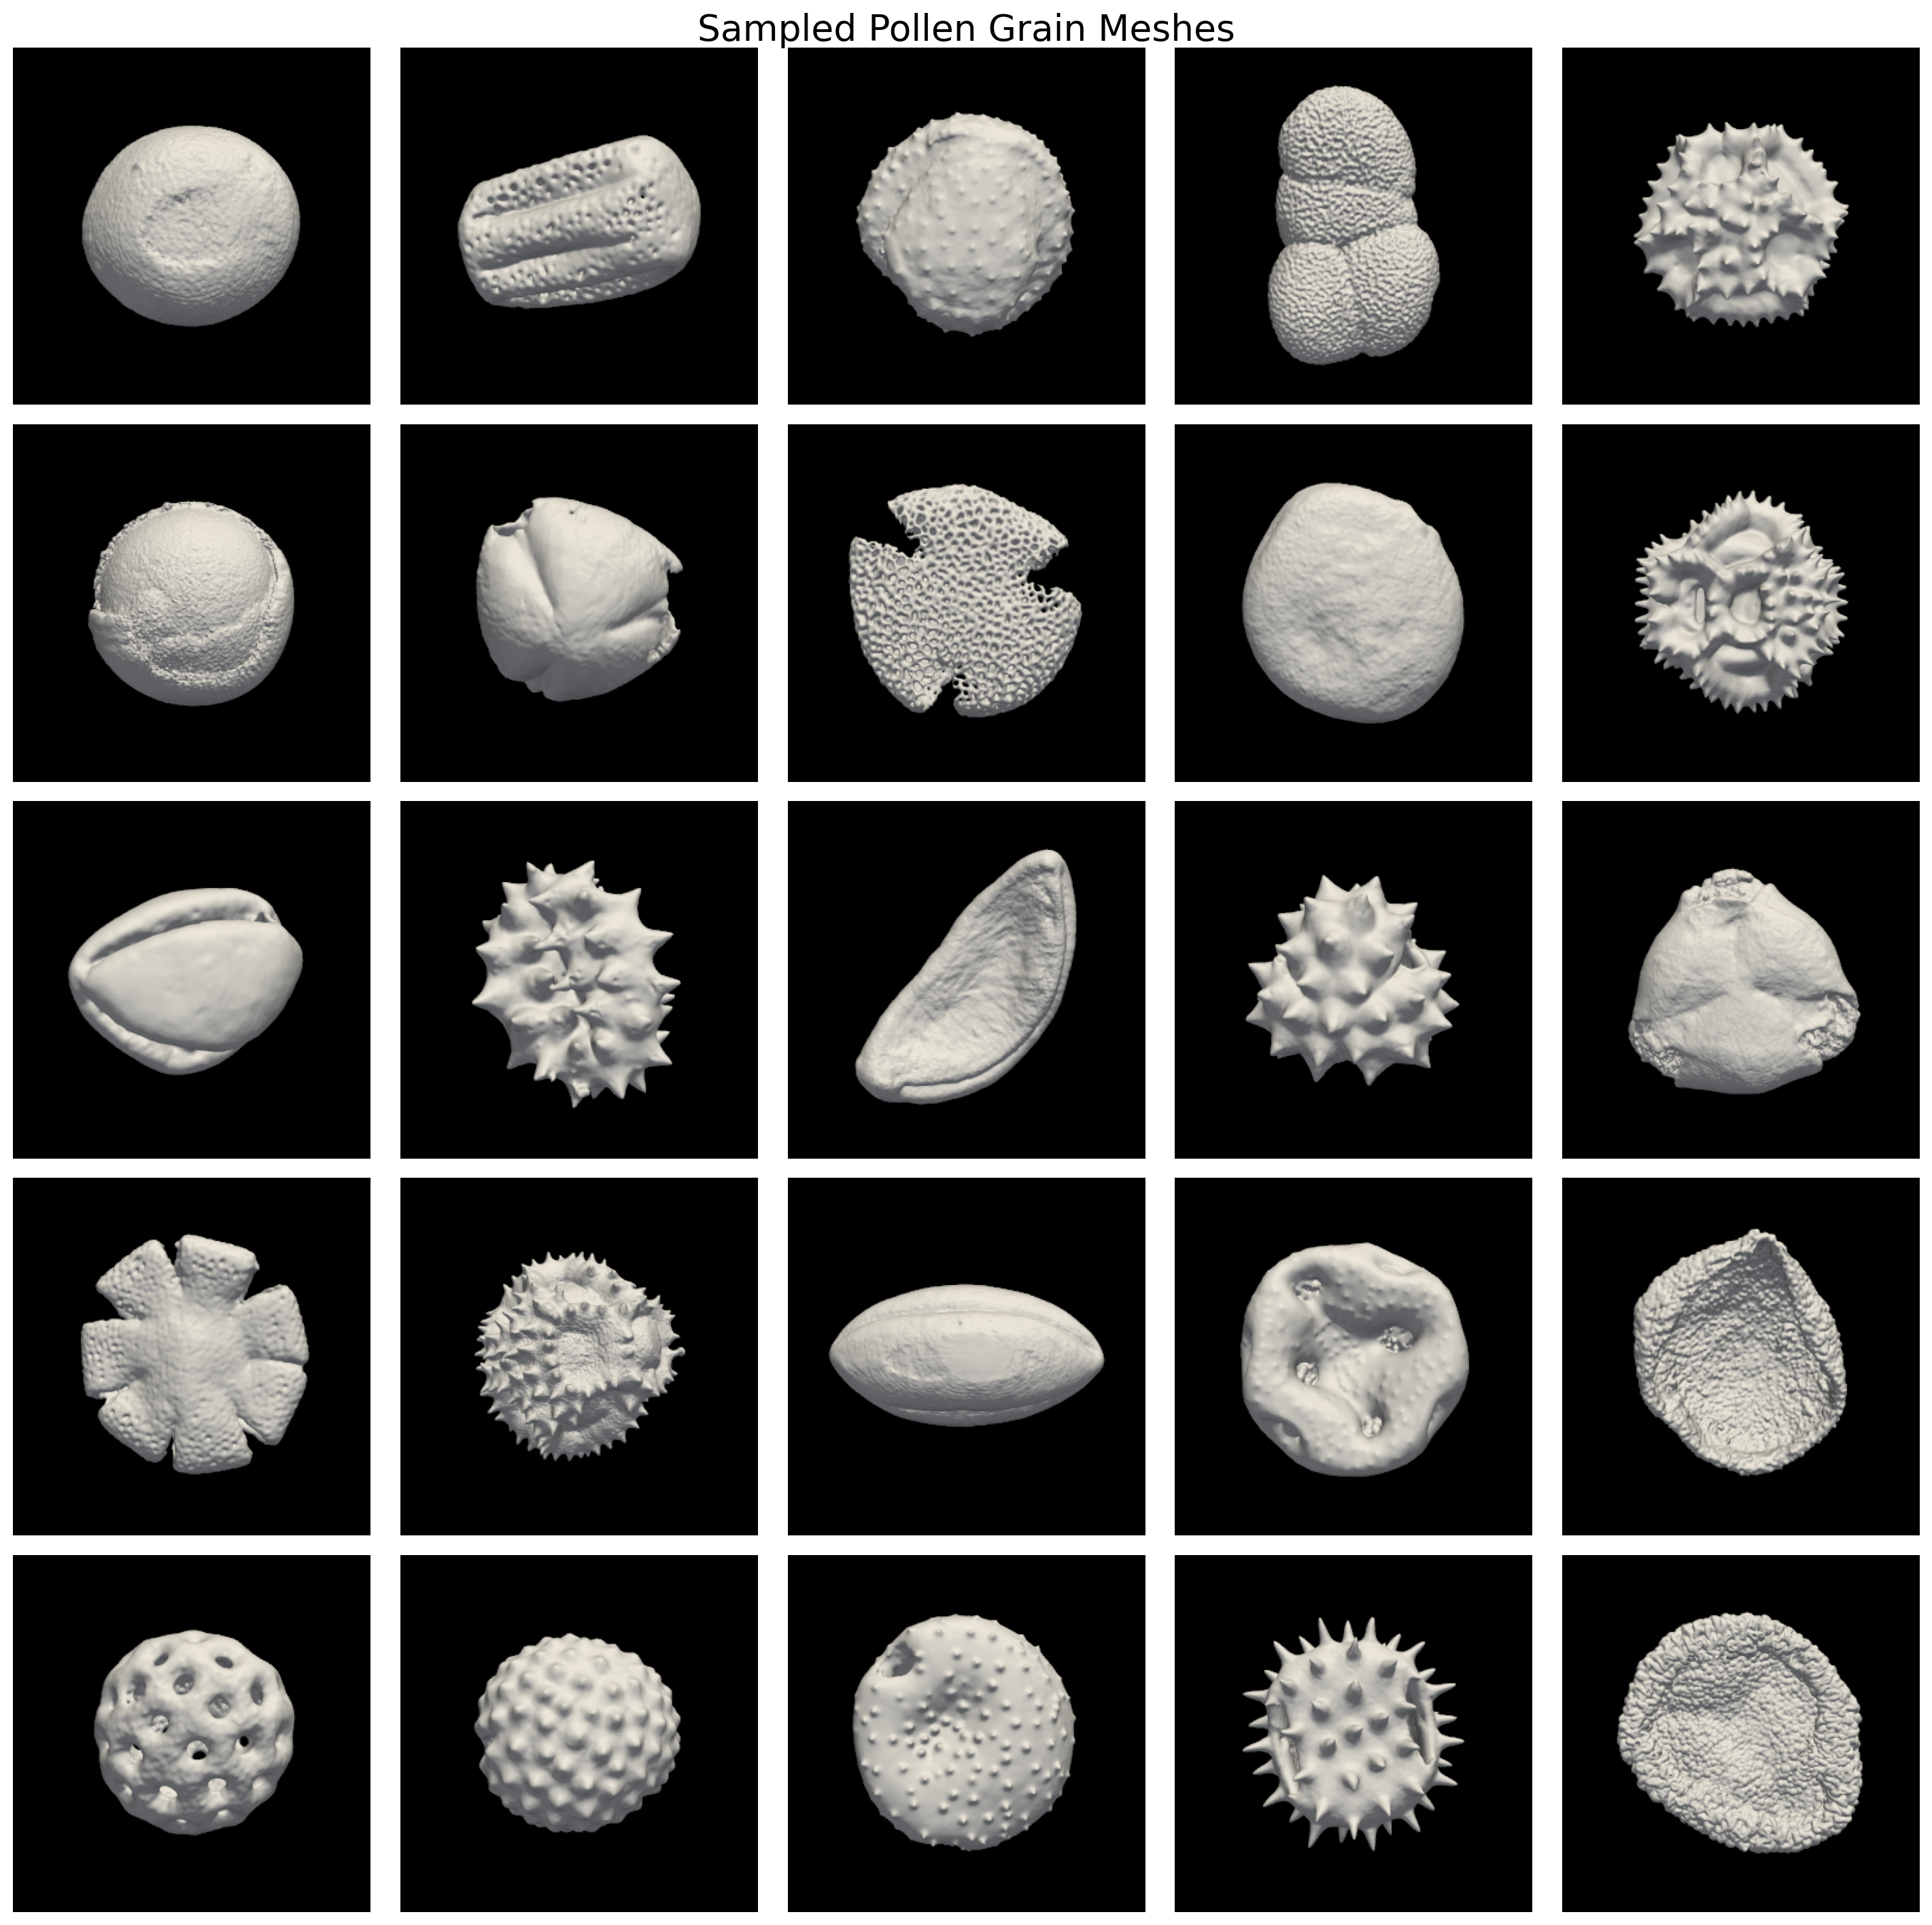

In [4]:
sample_size = 25
sampled_files = random.sample(stl_files, sample_size) if len(stl_files) >= sample_size else stl_files

screenshots = []
for file in sampled_files:
    file_path = os.path.join(RAW_MESHES_DIR, file)
    img = get_mesh_screenshot(file_path)
    if img is not None:
        screenshots.append(img)

# Adjust grid dimensions based on the number of valid screenshots
if len(screenshots) < 25:
    print(f"Only {len(screenshots)} valid meshes found. Adjusting grid layout accordingly.")
    n_rows = n_cols = int(len(screenshots) ** 0.5) or 1
else:
    n_rows, n_cols = 5, 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(screenshots):
        ax.imshow(screenshots[i])
    ax.axis("off")

plt.suptitle("Sampled Pollen Grain Meshes", fontsize=20)
plt.tight_layout()
plt.show()

In [5]:
def load_mesh(file_path):
    """
    Load an STL file and return a PyVista mesh object.
    
    Parameters:
        file_path (str): Path to the STL file.
    
    Returns:
        pv.PolyData: The loaded mesh.
    """
    mesh = pv.read(file_path)
    return mesh

def visualize_mesh(mesh, notebook=True):
    """
    Visualize the provided PyVista mesh.
    
    Parameters:
        mesh (pv.PolyData): The mesh to visualize.
        notebook (bool): Whether to render in a Jupyter notebook environment.
    """
    mesh.plot(notebook=notebook)


if stl_files:
    first_file_path = os.path.join(RAW_MESHES_DIR, stl_files[206])
    mesh_data = load_mesh(first_file_path)
    
    visualize_mesh(mesh_data, notebook=True)
else:
    print("No STL files found in the specified folder.")

Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1de5a5ccd50_0&reconnect=auto" class="pyvis…

In [6]:
import os
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import Parallel, delayed
from tqdm import tqdm

def compute_mesh_properties(mesh):
    """
    Compute key properties of a mesh using vectorized operations.
    
    Assumes that the mesh is triangulated.
    
    Returns a dictionary with:
      - n_vertices: number of vertices in the mesh.
      - n_faces: number of faces (using n_cells).
      - avg_edge_length: mean length of all edges.
      - std_edge_length: standard deviation of the edge lengths.
      - avg_normal_magnitude: average magnitude of point normals (if available).
    """
    n_vertices = mesh.n_points
    n_faces = mesh.n_cells  # Using n_cells instead of deprecated n_faces

    pts = mesh.points

    try:
        faces = mesh.faces.reshape((-1, 4))[:, 1:4]
    except Exception as e:
        print("Error reshaping faces. Mesh may not be triangulated.")
        return None

    face_pts = pts[faces]

    edge1 = face_pts[:, 1] - face_pts[:, 0]
    edge2 = face_pts[:, 2] - face_pts[:, 1]
    edge3 = face_pts[:, 0] - face_pts[:, 2]

    lengths1 = np.linalg.norm(edge1, axis=1)
    lengths2 = np.linalg.norm(edge2, axis=1)
    lengths3 = np.linalg.norm(edge3, axis=1)

    all_lengths = np.concatenate([lengths1, lengths2, lengths3])
    avg_edge_length = np.mean(all_lengths)
    std_edge_length = np.std(all_lengths)

    if hasattr(mesh, 'point_normals') and mesh.point_normals is not None:
        normals = mesh.point_normals
        avg_normal_magnitude = np.mean(np.linalg.norm(normals, axis=1))
    else:
        avg_normal_magnitude = None

    return {
        'n_vertices': n_vertices,
        'n_faces': n_faces,
        'avg_edge_length': avg_edge_length,
        'std_edge_length': std_edge_length,
        'avg_normal_magnitude': avg_normal_magnitude
    }

def process_file(file_path):
    """
    Helper function to process a single file. Returns mesh properties.
    """
    try:
        mesh = pv.read(file_path)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None
    if mesh.n_points == 0:
        print(f"Skipping empty mesh: {file_path}")
        return None
    props = compute_mesh_properties(mesh)
    return props

def flag_outliers(values):
    """
    Identify outliers based on the IQR method and sort them by how much they deviate from the threshold.
    
    For each value outside the acceptable range, the deviation is measured as:
      - lower deviation: lower_bound - value, if the value is below lower_bound.
      - upper deviation: value - upper_bound, if the value is above upper_bound.
    
    Returns a list of tuples (index, deviation) sorted in descending order of deviation.
    """
    values = np.array(values)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = []
    for i, v in enumerate(values):
        if v < lower_bound:
            deviation = lower_bound - v
            outliers.append((i, deviation))
        elif v > upper_bound:
            deviation = v - upper_bound
            outliers.append((i, deviation))
    # Sort outliers by deviation (largest deviation first)
    outliers_sorted = sorted(outliers, key=lambda x: x[1], reverse=True)
    return outliers_sorted

def analyze_dataset_properties(raw_meshes_dir):
    """
    Process all STL files in the specified directory in parallel using Joblib,
    compute mesh properties, print a summary of the mean and standard deviation
    for each property, and plot each metric on its own subplot with annotated bars.
    Returns the outlier indices for further inspection.
    """
    stl_files = [file for file in os.listdir(raw_meshes_dir) if file.endswith(".stl")]
    file_paths = [os.path.join(raw_meshes_dir, file) for file in stl_files]

    results = Parallel(n_jobs=-1)(
        delayed(process_file)(fp) for fp in tqdm(file_paths, desc="Processing meshes")
    )
    results = [r for r in results if r is not None]
    
    if not results:
        print("No valid meshes processed.")
        return

    # Collect each metric into separate lists
    vertices_list = [r['n_vertices'] for r in results]
    faces_list = [r['n_faces'] for r in results]
    edge_length_list = [r['avg_edge_length'] for r in results]
    edge_length_std_list = [r['std_edge_length'] for r in results]
    normal_mag_list = [r['avg_normal_magnitude'] for r in results if r['avg_normal_magnitude'] is not None]

    summary = {
        'n_vertices': (np.mean(vertices_list), np.std(vertices_list)),
        'n_faces': (np.mean(faces_list), np.std(faces_list)),
        'avg_edge_length': (np.mean(edge_length_list), np.std(edge_length_list)),
        'edge_length_std': (np.mean(edge_length_std_list), np.std(edge_length_std_list))
    }
    if normal_mag_list:
        summary['avg_normal_magnitude'] = (np.mean(normal_mag_list), np.std(normal_mag_list))
    
    print("\n--- Dataset Mesh Properties Summary (mean ± std) ---")
    for key, (mean_val, std_val) in summary.items():
        print(f" - {key}: {mean_val:.2f} ± {std_val:.2f}")
    
    # Compute outlier indices for each property (do not print them)
    outlier_indices = {}
    properties = {
        'n_vertices': vertices_list,
        'n_faces': faces_list,
        'avg_edge_length': edge_length_list,
        'edge_length_std': edge_length_std_list
    }
    if normal_mag_list:
        properties['avg_normal_magnitude'] = normal_mag_list

    for key, values in properties.items():
        sorted_outliers = flag_outliers(values)
        outlier_indices[key] = sorted_outliers
    
    return outlier_indices, {
    "vertices_list": vertices_list,
    "faces_list": faces_list,
    "edge_length_list": edge_length_list,
    "edge_length_std_list": edge_length_std_list,
    "normal_mag_list": normal_mag_list
    }

outliers, mesh_stats = analyze_dataset_properties(RAW_MESHES_DIR)

Processing meshes:   0%|          | 0/207 [00:00<?, ?it/s]

Processing meshes:  15%|█▌        | 32/207 [00:00<00:00, 266.06it/s]

Processing meshes:  31%|███       | 64/207 [00:00<00:02, 63.99it/s] 

Processing meshes:  46%|████▋     | 96/207 [00:02<00:03, 35.15it/s]

Processing meshes:  62%|██████▏   | 128/207 [00:04<00:03, 21.97it/s]

Processing meshes:  77%|███████▋  | 160/207 [00:05<00:01, 24.65it/s]

Processing meshes:  93%|█████████▎| 192/207 [00:06<00:00, 26.09it/s]

Processing meshes: 100%|██████████| 207/207 [00:06<00:00, 30.96it/s]


--- Dataset Mesh Properties Summary (mean ± std) ---
 - n_vertices: 269226.55 ± 216488.00
 - n_faces: 538485.99 ± 432855.65
 - avg_edge_length: 0.21 ± 0.10
 - edge_length_std: 0.09 ± 0.03
 - avg_normal_magnitude: 1.00 ± 0.00


In [7]:
def plot_top_outliers(metric_outliers, top_n=5, offset_distance=200.0, raw_meshes_dir=RAW_MESHES_DIR):
    """
    Plot the top_n outlier meshes for a given metric.
    
    Parameters:
        metric_outliers (list of tuples): Each tuple is (index, deviation).
        top_n (int): Number of outlier meshes to plot.
        offset_distance (float): Distance offset along the x-axis.
        raw_meshes_dir (str): Directory containing STL files.
    """
    stl_files = [file for file in os.listdir(raw_meshes_dir) if file.endswith(".stl")]
    
    top_outliers = metric_outliers[:top_n]
    print(f"--- Plotting top {len(top_outliers)} outliers ---")
    for i, (idx, deviation) in enumerate(top_outliers):
        print(f" - {idx}: {stl_files[idx]} (deviation: {deviation:.2f})")
    
    plotter = pv.Plotter()
    
    for i, (idx, deviation) in enumerate(top_outliers):
        file_path = os.path.join(raw_meshes_dir, stl_files[idx])
        try:
            mesh = pv.read(file_path)
        except Exception as e:
            print(f"Error reading {file_path}: {e}")
            continue
        
        offset = np.array([i * offset_distance, 0, 0])
        mesh.translate(offset, inplace=True)
        plotter.add_mesh(mesh, color='white', opacity=0.8)
    
    plotter.show()

# Plot the top 5 outliers based on n_vertices.
plot_top_outliers(outliers['n_vertices'], top_n=5)

--- Plotting top 5 outliers ---
 - 66: 17900_Germinating_lily_Lilium_sp_pollen_grain.stl (deviation: 1234488.00)
 - 55: 17846_Common_fern_Polypodium_vulgare_spore.stl (deviation: 424338.00)
 - 44: 17826_Blue_passion_flower_Passiflora_caerulea_pollen_grain.stl (deviation: 293871.00)
 - 119: 20939_Western_hemlock_Tsuga_heterophylla_pollen_grain.stl (deviation: 115916.00)
 - 87: 20611_Cuckoo_flower_Cardamine_pratensis_pollen_grain.stl (deviation: 86168.00)


Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1de5af13150_1&reconnect=auto" class="pyvis…

In [8]:
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler

def detect_duplicate_meshes(raw_meshes_dir, threshold=0.05):
    """
    Detect duplicate meshes based on their normalized geometric properties.
    
    Parameters:
        raw_meshes_dir (str): Directory containing STL files.
        threshold (float): Euclidean distance threshold for duplicates.
    
    Returns:
        duplicates (dict): Dictionary mapping a filename to a list of duplicates.
    """
    stl_files = [file for file in os.listdir(raw_meshes_dir) if file.endswith(".stl")]
    file_paths = [os.path.join(raw_meshes_dir, file) for file in stl_files]
    
    results = Parallel(n_jobs=-1)(
        delayed(process_file)(fp) for fp in tqdm(file_paths, desc="Processing meshes for duplicates")
    )
    valid_indices = [i for i, r in enumerate(results) if r is not None]
    valid_files = [stl_files[i] for i in valid_indices]
    
    features = []
    for r in results:
        if r is not None:
            features.append([
                r['n_vertices'],
                r['n_faces'],
                r['avg_edge_length'],
                r['std_edge_length']
            ])
    features = np.array(features)
    
    scaler = StandardScaler()
    features_norm = scaler.fit_transform(features)
    dist_matrix = squareform(pdist(features_norm, metric='euclidean'))
    
    duplicates = {}
    n = len(valid_files)
    for i in range(n):
        dup_list = []
        for j in range(i + 1, n):
            if dist_matrix[i, j] < threshold:
                dup_list.append(valid_files[j])
        if dup_list:
            duplicates[valid_files[i]] = dup_list
    return duplicates

dups = detect_duplicate_meshes(RAW_MESHES_DIR, threshold=0.05)
print("Duplicate candidates found:")
for key, dup_list in dups.items():
    print(f"File: {key} duplicates: {dup_list}")

Processing meshes for duplicates:   0%|          | 0/207 [00:00<?, ?it/s]

Processing meshes for duplicates:  31%|███       | 64/207 [00:00<00:00, 492.51it/s]

Processing meshes for duplicates:  62%|██████▏   | 128/207 [00:00<00:00, 118.45it/s]

Processing meshes for duplicates:  93%|█████████▎| 192/207 [00:03<00:00, 45.03it/s] 

Processing meshes for duplicates: 100%|██████████| 207/207 [00:03<00:00, 60.39it/s]

Duplicate candidates found:
File: 21256_German_knotweed_Scleranthus_annuus_pollen_grain_shrunken.stl duplicates: ['21271_White_campion_Silene_alba_pollen_grain_shrunken.stl']
File: 21264_European_goldenrod_Solidago_virgaurea_pollen_grain.stl duplicates: ['21266_Field_madder_Sherardia_arvensis_pollen_grain.stl']
File: 21376_Red_fescue_Festuca_rubra_pollen_grain_shrunken.stl duplicates: ['21377_Red_fescue_Festuca_rubra_pollen_grain_shrunken.stl']
File: 21378_Hemp-agrimony_Eupatorium_cannabinum_pollen_grain_shrunken.stl duplicates: ['21379_Hemp-agrimony_Eupatorium_cannabinum_pollen_grain_shrunken.stl']


In [9]:
# Experiment 4: Mesh Quality Analysis – Visualizing Typical Defects

# Visualize meshes with very high edge length std (irregular surfaces)
print("Visualizing top meshes with high standard deviation of edge lengths:")
plot_top_outliers(outliers['edge_length_std'], top_n=5)

# Visualize meshes with very low vertex count (over-simplified or broken)
# Sort in ascending order to get those with lowest n_vertices
lowest_vertices = sorted(outliers['n_vertices'], key=lambda x: x[1], reverse=True)[-5:]
print("\nVisualizing meshes with very low vertex counts:")
plot_top_outliers(lowest_vertices, top_n=5)

# Visualize meshes with low normal magnitude (noisy or flattened shapes), if normals are available
if 'avg_normal_magnitude' in outliers:
    print("\nVisualizing meshes with low average normal magnitude:")
    low_normal_mags = sorted(outliers['avg_normal_magnitude'], key=lambda x: x[1], reverse=True)[-5:]
    plot_top_outliers(low_normal_mags, top_n=5)
else:
    print("\nNo valid normal vectors available for avg_normal_magnitude analysis.")

Visualizing top meshes with high standard deviation of edge lengths:
--- Plotting top 5 outliers ---
 - 12: 17787_Yellow_iris_Iris_pseudacorus_pollen_grain.stl (deviation: 0.30)
 - 57: 17879_Pumpkin_Cucurbita_pepo_pollen_grain.stl (deviation: 0.04)
 - 10: 17785_Hedge_bindweed_Calystegia_sepium_pollen_grain.stl (deviation: 0.04)
 - 21: 17796_Hardy_fuchsia_Fuchsia_magellanica_pollen_grain.stl (deviation: 0.02)
 - 81: 20605_Field_maple_Acer_campestre_pollen_grain.stl (deviation: 0.02)


Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1de5af1c4d0_2&reconnect=auto" class="pyvis…


Visualizing meshes with very low vertex counts:
--- Plotting top 5 outliers ---
 - 64: 17886_Common_wheat_Triticum_aestivan_pollen_grain.stl (deviation: 59653.00)
 - 50: 17833_European_white_water_lily_Nymphaea_alba_pollen_grain.stl (deviation: 29662.00)
 - 57: 17879_Pumpkin_Cucurbita_pepo_pollen_grain.stl (deviation: 27549.00)
 - 61: 17883_Evening_primrose_Oenothera_fruticosa_pollen_grain.stl (deviation: 20212.00)
 - 148: 21252_Pontic_rhododendron_Rhododendron_ponticum_pollen_grain.stl (deviation: 7516.00)


Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1de6de05310_3&reconnect=auto" class="pyvis…


Visualizing meshes with low average normal magnitude:
--- Plotting top 5 outliers ---
 - 162: 21271_White_campion_Silene_alba_pollen_grain_shrunken.stl (deviation: 0.00)
 - 117: 20937_Small-leaved_lime_Tilia_cordata_pollen_grain.stl (deviation: 0.00)
 - 119: 20939_Western_hemlock_Tsuga_heterophylla_pollen_grain.stl (deviation: 0.00)
 - 116: 20936_Field_pennycress_Thlaspi_arvense_pollen_grain_2.stl (deviation: 0.00)
 - 138: 21145_Pine_Pinus_sp_pollen_grain.stl (deviation: 0.00)


Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1de6de5c7d0_4&reconnect=auto" class="pyvis…

In [10]:
def compute_curvature_metrics(mesh):
    """
    Compute curvature-based metrics from a mesh surface.
    
    Returns:
        mean_curv: Mean of mean curvature values
        std_curv: Standard deviation (roughness indicator)
    """
    try:
        curvatures = mesh.curvature(curv_type='mean')
    except Exception as e:
        print("Curvature computation failed:", e)
        return None

    mean_curv = np.mean(np.abs(curvatures))  # take abs to avoid cancellation
    std_curv = np.std(curvatures)

    return mean_curv, std_curv

In [11]:
curvature_results = []
curved_file_paths = []

for file in tqdm(stl_files, desc="Computing curvature metrics"):
    file_path = os.path.join(RAW_MESHES_DIR, file)
    try:
        mesh = pv.read(file_path)
        if mesh.n_points == 0:
            continue
        m, s = compute_curvature_metrics(mesh)
        if m is not None:
            curvature_results.append((m, s))
            curved_file_paths.append(file_path)
    except Exception as e:
        print("Error:", e)

mean_curvs, std_curvs = zip(*curvature_results)

Computing curvature metrics:   0%|          | 0/207 [00:00<?, ?it/s]

Computing curvature metrics:   1%|          | 2/207 [00:00<00:12, 16.65it/s]

Computing curvature metrics:   2%|▏         | 4/207 [00:00<00:14, 14.20it/s]

Computing curvature metrics:   3%|▎         | 6/207 [00:00<00:14, 14.02it/s]

Computing curvature metrics:   4%|▍         | 8/207 [00:00<00:14, 13.79it/s]

Computing curvature metrics:   5%|▍         | 10/207 [00:00<00:14, 14.03it/s]

Computing curvature metrics:   6%|▌         | 12/207 [00:00<00:14, 13.57it/s]

Computing curvature metrics:   7%|▋         | 14/207 [00:01<00:14, 13.35it/s]

Computing curvature metrics:   8%|▊         | 16/207 [00:01<00:14, 13.26it/s]

Computing curvature metrics:   9%|▊         | 18/207 [00:01<00:14, 12.96it/s]

Computing curvature metrics:  10%|▉         | 20/207 [00:01<00:14, 13.12it/s]

Computing curvature metrics:  11%|█         | 22/207 [00:01<00:14, 12.52it/s]

Computing curvature metrics:  12%|█▏        | 24/207 [00:01<00:14, 12.47it/s]

Computing curvature metrics:  13%|█▎        | 26/207 [00:02<00:17, 10.16it/s]

Computing curvature metrics:  14%|█▎        | 28/207 [00:02<00:16, 10.63it/s]

Computing curvature metrics:  14%|█▍        | 30/207 [00:02<00:17, 10.04it/s]

Computing curvature metrics:  15%|█▌        | 32/207 [00:02<00:21,  8.08it/s]

Computing curvature metrics:  16%|█▌        | 33/207 [00:03<00:23,  7.31it/s]

Computing curvature metrics:  16%|█▋        | 34/207 [00:03<00:27,  6.37it/s]

Computing curvature metrics:  17%|█▋        | 35/207 [00:03<00:29,  5.76it/s]

Computing curvature metrics:  17%|█▋        | 36/207 [00:03<00:32,  5.23it/s]

Computing curvature metrics:  18%|█▊        | 37/207 [00:04<00:35,  4.77it/s]

Computing curvature metrics:  18%|█▊        | 38/207 [00:04<00:38,  4.43it/s]

Computing curvature metrics:  19%|█▉        | 39/207 [00:04<00:33,  4.99it/s]

Computing curvature metrics:  19%|█▉        | 40/207 [00:04<00:36,  4.52it/s]

Computing curvature metrics:  20%|█▉        | 41/207 [00:05<00:40,  4.12it/s]

Computing curvature metrics:  20%|██        | 42/207 [00:05<00:43,  3.80it/s]

Computing curvature metrics:  21%|██        | 43/207 [00:05<00:46,  3.52it/s]

Computing curvature metrics:  21%|██▏       | 44/207 [00:05<00:48,  3.33it/s]

Computing curvature metrics:  22%|██▏       | 45/207 [00:06<01:15,  2.15it/s]

Computing curvature metrics:  22%|██▏       | 46/207 [00:07<01:10,  2.29it/s]

Computing curvature metrics:  23%|██▎       | 47/207 [00:07<01:08,  2.32it/s]

Computing curvature metrics:  23%|██▎       | 48/207 [00:08<01:09,  2.29it/s]

Computing curvature metrics:  24%|██▎       | 49/207 [00:08<01:13,  2.15it/s]

Computing curvature metrics:  24%|██▍       | 50/207 [00:09<01:17,  2.04it/s]

Computing curvature metrics:  25%|██▍       | 51/207 [00:09<01:21,  1.91it/s]

Computing curvature metrics:  25%|██▌       | 52/207 [00:10<01:26,  1.80it/s]

Computing curvature metrics:  26%|██▌       | 53/207 [00:10<01:16,  2.01it/s]

Computing curvature metrics:  26%|██▌       | 54/207 [00:11<01:17,  1.97it/s]

Computing curvature metrics:  27%|██▋       | 55/207 [00:11<01:13,  2.08it/s]

Computing curvature metrics:  27%|██▋       | 56/207 [00:12<01:36,  1.57it/s]

Computing curvature metrics:  28%|██▊       | 57/207 [00:12<01:12,  2.08it/s]

Computing curvature metrics:  28%|██▊       | 58/207 [00:13<01:18,  1.91it/s]

Computing curvature metrics:  29%|██▊       | 59/207 [00:13<01:07,  2.21it/s]

Computing curvature metrics:  29%|██▉       | 60/207 [00:14<01:01,  2.37it/s]

Computing curvature metrics:  29%|██▉       | 61/207 [00:14<01:01,  2.39it/s]

Computing curvature metrics:  30%|██▉       | 62/207 [00:15<01:10,  2.06it/s]

Computing curvature metrics:  30%|███       | 63/207 [00:15<01:02,  2.32it/s]

Computing curvature metrics:  31%|███       | 64/207 [00:15<00:49,  2.88it/s]

Computing curvature metrics:  31%|███▏      | 65/207 [00:16<01:01,  2.29it/s]

Computing curvature metrics:  32%|███▏      | 66/207 [00:16<00:50,  2.81it/s]

Computing curvature metrics:  32%|███▏      | 67/207 [00:18<02:00,  1.17it/s]

Computing curvature metrics:  33%|███▎      | 68/207 [00:18<01:34,  1.47it/s]

Computing curvature metrics:  33%|███▎      | 69/207 [00:18<01:12,  1.89it/s]

Computing curvature metrics:  34%|███▍      | 71/207 [00:19<00:49,  2.74it/s]

Computing curvature metrics:  35%|███▍      | 72/207 [00:19<00:46,  2.91it/s]

Computing curvature metrics:  35%|███▌      | 73/207 [00:19<00:41,  3.22it/s]

Computing curvature metrics:  36%|███▌      | 75/207 [00:19<00:27,  4.78it/s]

Computing curvature metrics:  37%|███▋      | 76/207 [00:20<00:28,  4.55it/s]

Computing curvature metrics:  37%|███▋      | 77/207 [00:20<00:31,  4.12it/s]

Computing curvature metrics:  38%|███▊      | 78/207 [00:20<00:30,  4.26it/s]

Computing curvature metrics:  38%|███▊      | 79/207 [00:20<00:33,  3.81it/s]

Computing curvature metrics:  39%|███▊      | 80/207 [00:21<00:46,  2.71it/s]

Computing curvature metrics:  39%|███▉      | 81/207 [00:21<00:39,  3.16it/s]

Computing curvature metrics:  40%|███▉      | 82/207 [00:22<00:42,  2.91it/s]

Computing curvature metrics:  40%|████      | 83/207 [00:22<00:38,  3.24it/s]

Computing curvature metrics:  41%|████      | 84/207 [00:22<00:39,  3.09it/s]

Computing curvature metrics:  41%|████      | 85/207 [00:23<00:36,  3.36it/s]

Computing curvature metrics:  42%|████▏     | 86/207 [00:23<00:33,  3.58it/s]

Computing curvature metrics:  42%|████▏     | 87/207 [00:23<00:30,  3.90it/s]

Computing curvature metrics:  43%|████▎     | 88/207 [00:24<00:43,  2.73it/s]

Computing curvature metrics:  43%|████▎     | 89/207 [00:24<00:41,  2.81it/s]

Computing curvature metrics:  43%|████▎     | 90/207 [00:24<00:33,  3.48it/s]

Computing curvature metrics:  44%|████▍     | 91/207 [00:24<00:28,  4.01it/s]

Computing curvature metrics:  44%|████▍     | 92/207 [00:24<00:24,  4.74it/s]

Computing curvature metrics:  45%|████▍     | 93/207 [00:24<00:21,  5.28it/s]

Computing curvature metrics:  45%|████▌     | 94/207 [00:25<00:19,  5.67it/s]

Computing curvature metrics:  46%|████▋     | 96/207 [00:25<00:15,  7.40it/s]

Computing curvature metrics:  47%|████▋     | 97/207 [00:25<00:13,  7.88it/s]

Computing curvature metrics:  48%|████▊     | 99/207 [00:25<00:14,  7.46it/s]

Computing curvature metrics:  48%|████▊     | 100/207 [00:25<00:14,  7.27it/s]

Computing curvature metrics:  49%|████▉     | 101/207 [00:25<00:15,  7.06it/s]

Computing curvature metrics:  49%|████▉     | 102/207 [00:26<00:14,  7.45it/s]

Computing curvature metrics:  50%|████▉     | 103/207 [00:26<00:16,  6.46it/s]

Computing curvature metrics:  51%|█████     | 105/207 [00:26<00:12,  8.34it/s]

Computing curvature metrics:  52%|█████▏    | 107/207 [00:26<00:10,  9.33it/s]

Computing curvature metrics:  52%|█████▏    | 108/207 [00:26<00:10,  9.38it/s]

Computing curvature metrics:  53%|█████▎    | 109/207 [00:26<00:10,  9.22it/s]

Computing curvature metrics:  53%|█████▎    | 110/207 [00:26<00:10,  8.99it/s]

Computing curvature metrics:  54%|█████▎    | 111/207 [00:27<00:11,  8.18it/s]

Computing curvature metrics:  54%|█████▍    | 112/207 [00:27<00:11,  7.93it/s]

Computing curvature metrics:  55%|█████▍    | 113/207 [00:27<00:11,  8.40it/s]

Computing curvature metrics:  56%|█████▌    | 115/207 [00:27<00:11,  8.11it/s]

Computing curvature metrics:  56%|█████▌    | 116/207 [00:27<00:11,  7.66it/s]

Computing curvature metrics:  57%|█████▋    | 117/207 [00:27<00:12,  7.47it/s]

Computing curvature metrics:  57%|█████▋    | 118/207 [00:28<00:16,  5.30it/s]

Computing curvature metrics:  57%|█████▋    | 119/207 [00:28<00:14,  5.93it/s]

Computing curvature metrics:  58%|█████▊    | 120/207 [00:29<00:27,  3.16it/s]

Computing curvature metrics:  58%|█████▊    | 121/207 [00:29<00:29,  2.95it/s]

Computing curvature metrics:  59%|█████▉    | 122/207 [00:29<00:31,  2.70it/s]

Computing curvature metrics:  59%|█████▉    | 123/207 [00:30<00:29,  2.86it/s]

Computing curvature metrics:  60%|█████▉    | 124/207 [00:30<00:26,  3.12it/s]

Computing curvature metrics:  60%|██████    | 125/207 [00:31<00:31,  2.59it/s]

Computing curvature metrics:  61%|██████    | 126/207 [00:31<00:25,  3.15it/s]

Computing curvature metrics:  61%|██████▏   | 127/207 [00:31<00:21,  3.75it/s]

Computing curvature metrics:  62%|██████▏   | 128/207 [00:31<00:17,  4.52it/s]

Computing curvature metrics:  62%|██████▏   | 129/207 [00:31<00:16,  4.62it/s]

Computing curvature metrics:  63%|██████▎   | 130/207 [00:31<00:14,  5.16it/s]

Computing curvature metrics:  63%|██████▎   | 131/207 [00:31<00:13,  5.76it/s]

Computing curvature metrics:  64%|██████▍   | 132/207 [00:32<00:13,  5.66it/s]

Computing curvature metrics:  64%|██████▍   | 133/207 [00:32<00:14,  5.03it/s]

Computing curvature metrics:  65%|██████▍   | 134/207 [00:32<00:12,  5.81it/s]

Computing curvature metrics:  65%|██████▌   | 135/207 [00:32<00:14,  5.12it/s]

Computing curvature metrics:  66%|██████▌   | 136/207 [00:32<00:12,  5.89it/s]

Computing curvature metrics:  66%|██████▌   | 137/207 [00:33<00:14,  4.71it/s]

Computing curvature metrics:  67%|██████▋   | 138/207 [00:33<00:14,  4.87it/s]

Computing curvature metrics:  67%|██████▋   | 139/207 [00:33<00:18,  3.70it/s]

Computing curvature metrics:  68%|██████▊   | 140/207 [00:33<00:15,  4.21it/s]

Computing curvature metrics:  69%|██████▊   | 142/207 [00:34<00:11,  5.75it/s]

Computing curvature metrics:  69%|██████▉   | 143/207 [00:34<00:10,  6.39it/s]

Computing curvature metrics:  70%|██████▉   | 144/207 [00:34<00:11,  5.37it/s]

Computing curvature metrics:  70%|███████   | 145/207 [00:34<00:13,  4.67it/s]

Computing curvature metrics:  71%|███████   | 146/207 [00:34<00:13,  4.64it/s]

Computing curvature metrics:  71%|███████▏  | 148/207 [00:35<00:11,  5.30it/s]

Computing curvature metrics:  72%|███████▏  | 149/207 [00:35<00:16,  3.57it/s]

Computing curvature metrics:  72%|███████▏  | 150/207 [00:36<00:14,  3.99it/s]

Computing curvature metrics:  73%|███████▎  | 151/207 [00:36<00:15,  3.71it/s]

Computing curvature metrics:  73%|███████▎  | 152/207 [00:36<00:12,  4.48it/s]

Computing curvature metrics:  74%|███████▍  | 153/207 [00:36<00:12,  4.16it/s]

Computing curvature metrics:  74%|███████▍  | 154/207 [00:36<00:12,  4.23it/s]

Computing curvature metrics:  75%|███████▍  | 155/207 [00:37<00:13,  3.75it/s]

Computing curvature metrics:  75%|███████▌  | 156/207 [00:37<00:11,  4.33it/s]

Computing curvature metrics:  76%|███████▌  | 157/207 [00:37<00:10,  4.98it/s]

Computing curvature metrics:  76%|███████▋  | 158/207 [00:37<00:09,  5.38it/s]

Computing curvature metrics:  77%|███████▋  | 159/207 [00:38<00:13,  3.57it/s]

Computing curvature metrics:  78%|███████▊  | 161/207 [00:38<00:09,  4.86it/s]

Computing curvature metrics:  78%|███████▊  | 162/207 [00:38<00:08,  5.30it/s]

Computing curvature metrics:  79%|███████▊  | 163/207 [00:38<00:09,  4.65it/s]

Computing curvature metrics:  79%|███████▉  | 164/207 [00:39<00:08,  4.93it/s]

Computing curvature metrics:  80%|███████▉  | 165/207 [00:39<00:07,  5.45it/s]

Computing curvature metrics:  80%|████████  | 166/207 [00:39<00:08,  4.98it/s]

Computing curvature metrics:  81%|████████  | 168/207 [00:39<00:07,  5.34it/s]

Computing curvature metrics:  82%|████████▏ | 169/207 [00:39<00:07,  5.30it/s]

Computing curvature metrics:  82%|████████▏ | 170/207 [00:40<00:06,  5.30it/s]

Computing curvature metrics:  83%|████████▎ | 171/207 [00:40<00:06,  5.46it/s]

Computing curvature metrics:  83%|████████▎ | 172/207 [00:40<00:06,  5.59it/s]

Computing curvature metrics:  84%|████████▎ | 173/207 [00:41<00:10,  3.22it/s]

Computing curvature metrics:  84%|████████▍ | 174/207 [00:41<00:08,  3.89it/s]

Computing curvature metrics:  85%|████████▍ | 175/207 [00:41<00:09,  3.24it/s]

Computing curvature metrics:  85%|████████▌ | 176/207 [00:41<00:08,  3.73it/s]

Computing curvature metrics:  86%|████████▌ | 177/207 [00:42<00:07,  4.20it/s]

Computing curvature metrics:  86%|████████▌ | 178/207 [00:42<00:07,  3.95it/s]

Computing curvature metrics:  86%|████████▋ | 179/207 [00:42<00:06,  4.02it/s]

Computing curvature metrics:  87%|████████▋ | 180/207 [00:42<00:06,  4.32it/s]

Computing curvature metrics:  87%|████████▋ | 181/207 [00:42<00:05,  4.44it/s]

Computing curvature metrics:  88%|████████▊ | 182/207 [00:43<00:04,  5.17it/s]

Computing curvature metrics:  88%|████████▊ | 183/207 [00:43<00:04,  5.51it/s]

Computing curvature metrics:  89%|████████▉ | 184/207 [00:43<00:05,  4.02it/s]

Computing curvature metrics:  89%|████████▉ | 185/207 [00:43<00:05,  4.07it/s]

Computing curvature metrics:  90%|████████▉ | 186/207 [00:44<00:05,  3.86it/s]

Computing curvature metrics:  91%|█████████ | 188/207 [00:44<00:04,  4.65it/s]

Computing curvature metrics:  91%|█████████▏| 189/207 [00:44<00:03,  4.82it/s]

Computing curvature metrics:  92%|█████████▏| 190/207 [00:45<00:04,  3.46it/s]

Computing curvature metrics:  92%|█████████▏| 191/207 [00:45<00:03,  4.11it/s]

Computing curvature metrics:  93%|█████████▎| 193/207 [00:45<00:02,  5.37it/s]

Computing curvature metrics:  94%|█████████▎| 194/207 [00:45<00:02,  5.43it/s]

Computing curvature metrics:  94%|█████████▍| 195/207 [00:45<00:02,  4.73it/s]

Computing curvature metrics:  95%|█████████▍| 196/207 [00:46<00:02,  4.74it/s]

Computing curvature metrics:  95%|█████████▌| 197/207 [00:46<00:02,  3.95it/s]

Computing curvature metrics:  96%|█████████▌| 199/207 [00:46<00:01,  5.03it/s]

Computing curvature metrics:  97%|█████████▋| 200/207 [00:47<00:01,  5.21it/s]

Computing curvature metrics:  98%|█████████▊| 202/207 [00:47<00:00,  6.18it/s]

Computing curvature metrics:  98%|█████████▊| 203/207 [00:47<00:00,  6.56it/s]

Computing curvature metrics:  99%|█████████▊| 204/207 [00:47<00:00,  5.33it/s]

Computing curvature metrics:  99%|█████████▉| 205/207 [00:47<00:00,  4.61it/s]

Computing curvature metrics: 100%|█████████▉| 206/207 [00:48<00:00,  3.29it/s]

Computing curvature metrics: 100%|██████████| 207/207 [00:48<00:00,  4.26it/s]

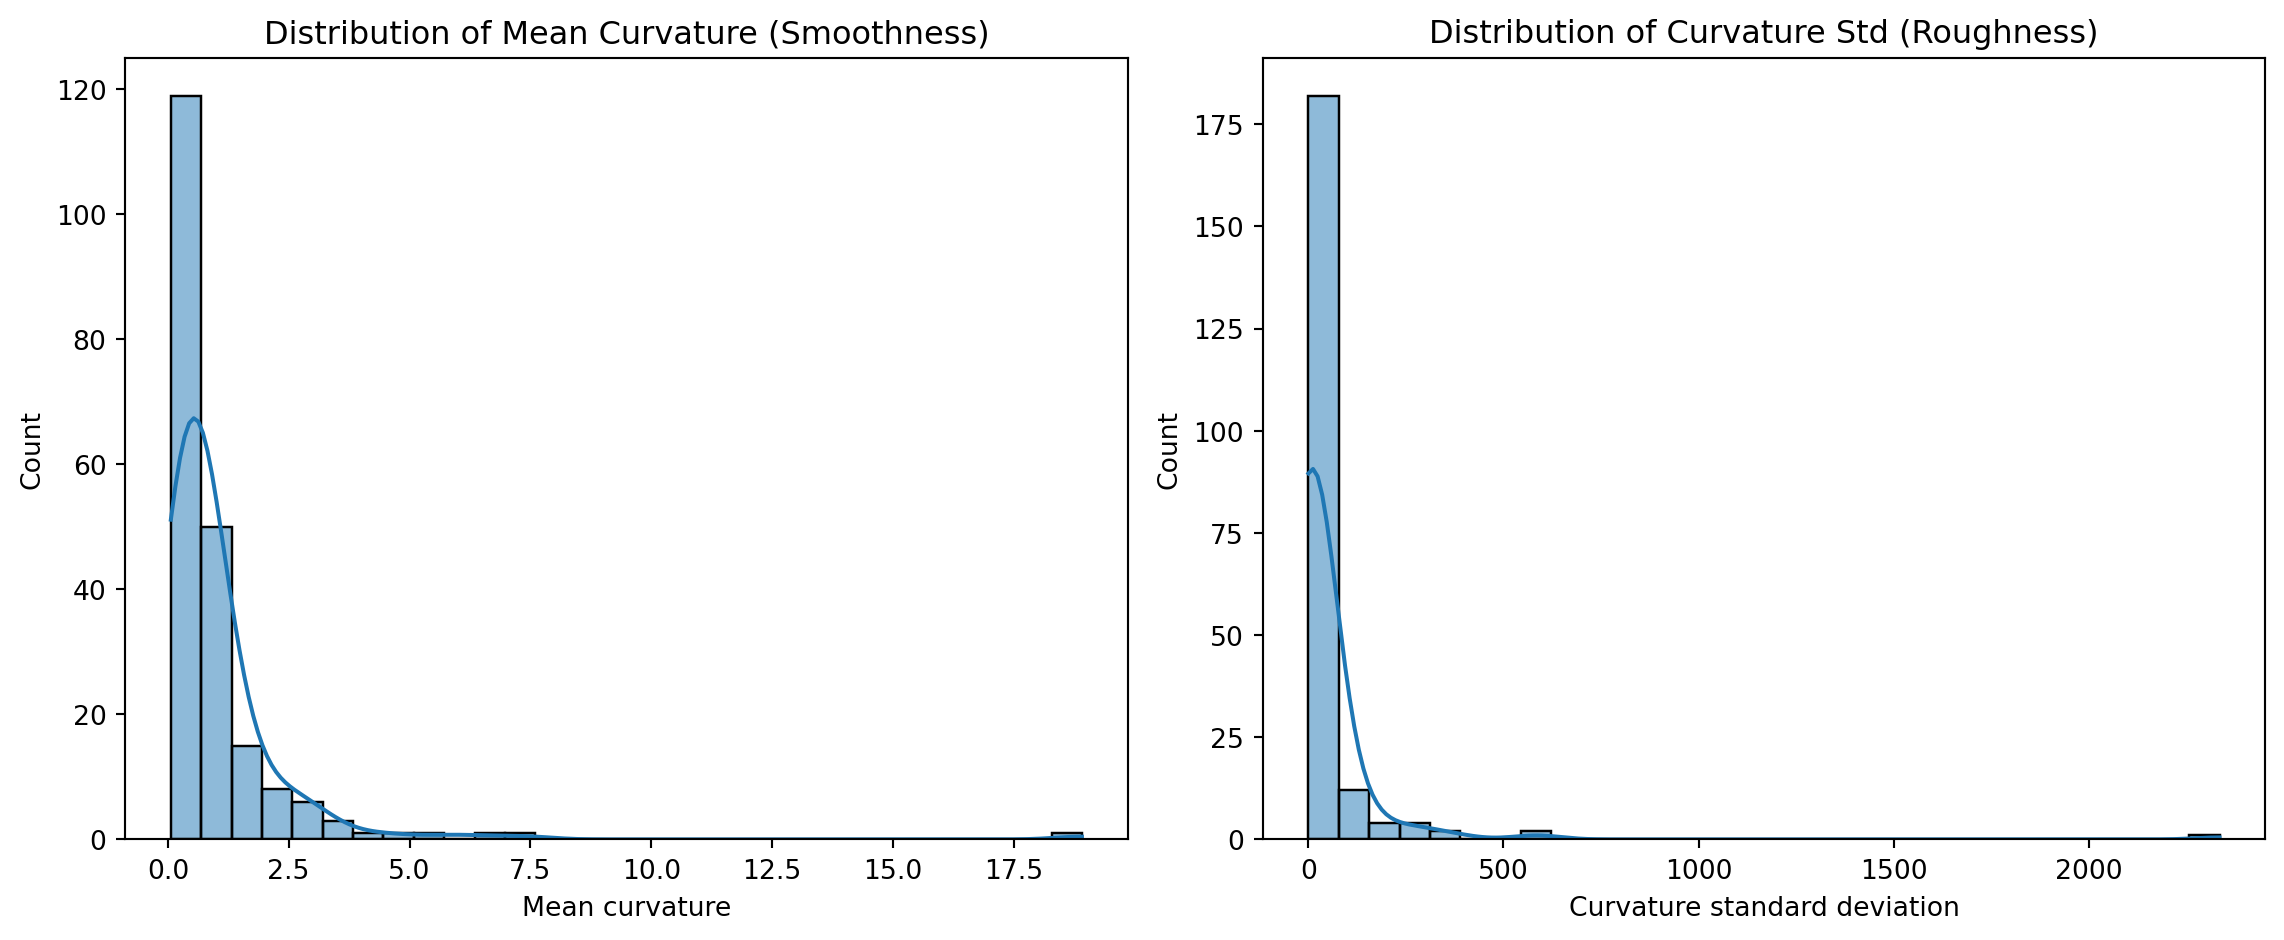

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(mean_curvs, bins=30, kde=True)
plt.title("Distribution of Mean Curvature (Smoothness)")
plt.xlabel("Mean curvature")

plt.subplot(1, 2, 2)
sns.histplot(std_curvs, bins=30, kde=True)
plt.title("Distribution of Curvature Std (Roughness)")
plt.xlabel("Curvature standard deviation")

plt.tight_layout()
plt.show()

In [13]:
# Top 3 smoothest and roughest meshes
smoothest = np.argsort(mean_curvs)[:3]
roughest = np.argsort(std_curvs)[-3:]

def show_mesh_group(indices, title):
    plotter = pv.Plotter(shape=(1, len(indices)))
    for i, idx in enumerate(indices):
        mesh = pv.read(curved_file_paths[idx])
        plotter.subplot(0, i)
        plotter.add_mesh(mesh, color="white")
        plotter.camera_position = 'xy'
    plotter.show(title=title)

show_mesh_group(smoothest, "Smoothest Meshes (Low Mean Curvature)")
show_mesh_group(roughest, "Roughest Meshes (High Curvature Std)")

Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1deddd21290_5&reconnect=auto" class="pyvis…

Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1deddd27850_6&reconnect=auto" class="pyvis…

In [14]:
def classify_shape(mesh, tolerance=0.15):
    """
    Classify mesh into simple geometric shape based on bounding box dimensions.
    
    Returns:
        str: one of ['spherical', 'ellipsoidal', 'elongated', 'flattened', 'irregular']
    """
    bounds = mesh.bounds  # (xmin, xmax, ymin, ymax, zmin, zmax)
    dims = np.array([
        bounds[1] - bounds[0],
        bounds[3] - bounds[2],
        bounds[5] - bounds[4],
    ])
    dims_sorted = np.sort(dims)
    ratios = dims_sorted / np.max(dims_sorted)

    # Heuristics:
    if np.all(np.abs(ratios - 1.0) < tolerance):
        return "spherical"
    elif ratios[2] > 0.8 and ratios[0] > 0.6:
        return "ellipsoidal"
    elif ratios[2] > 0.9 and ratios[0] < 0.5:
        return "elongated"
    elif ratios[0] < 0.3 and ratios[2] < 0.8:
        return "flattened"
    else:
        return "irregular"

In [15]:
shape_labels = []
shape_file_paths = []

for file in tqdm(stl_files, desc="Classifying mesh shapes"):
    file_path = os.path.join(RAW_MESHES_DIR, file)
    try:
        mesh = pv.read(file_path)
        if mesh.n_points == 0:
            continue
        shape = classify_shape(mesh)
        shape_labels.append(shape)
        shape_file_paths.append(file_path)
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

Classifying mesh shapes:   0%|          | 0/207 [00:00<?, ?it/s]

Classifying mesh shapes:   2%|▏         | 4/207 [00:00<00:06, 31.97it/s]

Classifying mesh shapes:   4%|▍         | 8/207 [00:00<00:06, 31.66it/s]

Classifying mesh shapes:   6%|▌         | 12/207 [00:00<00:06, 31.69it/s]

Classifying mesh shapes:   8%|▊         | 16/207 [00:00<00:06, 31.10it/s]

Classifying mesh shapes:  10%|▉         | 20/207 [00:00<00:06, 30.28it/s]

Classifying mesh shapes:  12%|█▏        | 24/207 [00:00<00:06, 29.15it/s]

Classifying mesh shapes:  13%|█▎        | 27/207 [00:00<00:07, 24.39it/s]

Classifying mesh shapes:  14%|█▍        | 30/207 [00:01<00:07, 23.06it/s]

Classifying mesh shapes:  16%|█▌        | 33/207 [00:01<00:10, 17.12it/s]

Classifying mesh shapes:  17%|█▋        | 35/207 [00:01<00:12, 14.06it/s]

Classifying mesh shapes:  18%|█▊        | 37/207 [00:01<00:14, 11.74it/s]

Classifying mesh shapes:  19%|█▉        | 39/207 [00:02<00:14, 11.27it/s]

Classifying mesh shapes:  20%|█▉        | 41/207 [00:02<00:17,  9.59it/s]

Classifying mesh shapes:  21%|██        | 43/207 [00:02<00:19,  8.26it/s]

Classifying mesh shapes:  21%|██▏       | 44/207 [00:02<00:21,  7.67it/s]

Classifying mesh shapes:  22%|██▏       | 45/207 [00:03<00:28,  5.71it/s]

Classifying mesh shapes:  22%|██▏       | 46/207 [00:03<00:29,  5.53it/s]

Classifying mesh shapes:  23%|██▎       | 47/207 [00:03<00:30,  5.22it/s]

Classifying mesh shapes:  23%|██▎       | 48/207 [00:03<00:32,  4.88it/s]

Classifying mesh shapes:  24%|██▎       | 49/207 [00:04<00:35,  4.40it/s]

Classifying mesh shapes:  24%|██▍       | 50/207 [00:04<00:38,  4.06it/s]

Classifying mesh shapes:  25%|██▍       | 51/207 [00:04<00:41,  3.74it/s]

Classifying mesh shapes:  25%|██▌       | 52/207 [00:05<00:44,  3.46it/s]

Classifying mesh shapes:  26%|██▌       | 53/207 [00:05<00:38,  3.96it/s]

Classifying mesh shapes:  26%|██▌       | 54/207 [00:05<00:38,  3.99it/s]

Classifying mesh shapes:  27%|██▋       | 55/207 [00:05<00:36,  4.16it/s]

Classifying mesh shapes:  27%|██▋       | 56/207 [00:06<00:47,  3.19it/s]

Classifying mesh shapes:  28%|██▊       | 58/207 [00:06<00:36,  4.06it/s]

Classifying mesh shapes:  29%|██▊       | 59/207 [00:06<00:32,  4.51it/s]

Classifying mesh shapes:  29%|██▉       | 60/207 [00:06<00:30,  4.83it/s]

Classifying mesh shapes:  29%|██▉       | 61/207 [00:07<00:29,  4.87it/s]

Classifying mesh shapes:  30%|██▉       | 62/207 [00:07<00:34,  4.15it/s]

Classifying mesh shapes:  30%|███       | 63/207 [00:07<00:31,  4.61it/s]

Classifying mesh shapes:  31%|███▏      | 65/207 [00:08<00:29,  4.74it/s]

Classifying mesh shapes:  32%|███▏      | 67/207 [00:09<00:50,  2.80it/s]

Classifying mesh shapes:  33%|███▎      | 68/207 [00:09<00:43,  3.23it/s]

Classifying mesh shapes:  34%|███▍      | 70/207 [00:09<00:29,  4.61it/s]

Classifying mesh shapes:  34%|███▍      | 71/207 [00:09<00:26,  5.11it/s]

Classifying mesh shapes:  35%|███▍      | 72/207 [00:09<00:24,  5.54it/s]

Classifying mesh shapes:  35%|███▌      | 73/207 [00:09<00:21,  6.21it/s]

Classifying mesh shapes:  37%|███▋      | 76/207 [00:10<00:14,  9.13it/s]

Classifying mesh shapes:  38%|███▊      | 78/207 [00:10<00:14,  8.91it/s]

Classifying mesh shapes:  39%|███▊      | 80/207 [00:10<00:18,  6.83it/s]

Classifying mesh shapes:  40%|███▉      | 82/207 [00:11<00:18,  6.91it/s]

Classifying mesh shapes:  40%|████      | 83/207 [00:11<00:17,  7.21it/s]

Classifying mesh shapes:  41%|████      | 84/207 [00:11<00:17,  6.83it/s]

Classifying mesh shapes:  41%|████      | 85/207 [00:11<00:16,  7.28it/s]

Classifying mesh shapes:  42%|████▏     | 86/207 [00:11<00:16,  7.56it/s]

Classifying mesh shapes:  43%|████▎     | 88/207 [00:11<00:19,  6.25it/s]

Classifying mesh shapes:  43%|████▎     | 89/207 [00:12<00:18,  6.30it/s]

Classifying mesh shapes:  44%|████▍     | 91/207 [00:12<00:14,  8.21it/s]

Classifying mesh shapes:  45%|████▍     | 93/207 [00:12<00:11,  9.97it/s]

Classifying mesh shapes:  46%|████▌     | 95/207 [00:12<00:09, 11.91it/s]

Classifying mesh shapes:  47%|████▋     | 98/207 [00:12<00:07, 15.16it/s]

Classifying mesh shapes:  48%|████▊     | 100/207 [00:12<00:07, 14.21it/s]

Classifying mesh shapes:  49%|████▉     | 102/207 [00:12<00:07, 14.59it/s]

Classifying mesh shapes:  50%|█████     | 104/207 [00:12<00:07, 14.22it/s]

Classifying mesh shapes:  52%|█████▏    | 107/207 [00:13<00:05, 17.19it/s]

Classifying mesh shapes:  53%|█████▎    | 109/207 [00:13<00:05, 17.76it/s]

Classifying mesh shapes:  54%|█████▎    | 111/207 [00:13<00:05, 17.42it/s]

Classifying mesh shapes:  55%|█████▍    | 113/207 [00:13<00:05, 17.85it/s]

Classifying mesh shapes:  56%|█████▌    | 115/207 [00:13<00:05, 17.73it/s]

Classifying mesh shapes:  57%|█████▋    | 117/207 [00:13<00:05, 16.69it/s]

Classifying mesh shapes:  57%|█████▋    | 119/207 [00:13<00:06, 13.72it/s]

Classifying mesh shapes:  58%|█████▊    | 121/207 [00:14<00:10,  8.12it/s]

Classifying mesh shapes:  59%|█████▉    | 123/207 [00:14<00:11,  7.29it/s]

Classifying mesh shapes:  60%|█████▉    | 124/207 [00:14<00:11,  7.51it/s]

Classifying mesh shapes:  60%|██████    | 125/207 [00:15<00:12,  6.44it/s]

Classifying mesh shapes:  61%|██████▏   | 127/207 [00:15<00:09,  8.07it/s]

Classifying mesh shapes:  62%|██████▏   | 129/207 [00:15<00:08,  9.42it/s]

Classifying mesh shapes:  63%|██████▎   | 131/207 [00:15<00:06, 10.96it/s]

Classifying mesh shapes:  64%|██████▍   | 133/207 [00:15<00:06, 10.71it/s]

Classifying mesh shapes:  65%|██████▌   | 135/207 [00:15<00:06, 11.16it/s]

Classifying mesh shapes:  66%|██████▌   | 137/207 [00:16<00:06, 10.91it/s]

Classifying mesh shapes:  67%|██████▋   | 139/207 [00:16<00:07,  9.34it/s]

Classifying mesh shapes:  68%|██████▊   | 141/207 [00:16<00:06, 10.82it/s]

Classifying mesh shapes:  69%|██████▉   | 143/207 [00:16<00:05, 12.38it/s]

Classifying mesh shapes:  70%|███████   | 145/207 [00:16<00:05, 10.66it/s]

Classifying mesh shapes:  71%|███████   | 147/207 [00:16<00:05, 11.49it/s]

Classifying mesh shapes:  72%|███████▏  | 149/207 [00:17<00:06,  8.73it/s]

Classifying mesh shapes:  73%|███████▎  | 151/207 [00:17<00:06,  8.87it/s]

Classifying mesh shapes:  74%|███████▍  | 153/207 [00:17<00:05,  9.48it/s]

Classifying mesh shapes:  75%|███████▍  | 155/207 [00:17<00:05,  8.83it/s]

Classifying mesh shapes:  76%|███████▌  | 157/207 [00:18<00:04, 10.19it/s]

Classifying mesh shapes:  77%|███████▋  | 159/207 [00:18<00:05,  8.87it/s]

Classifying mesh shapes:  78%|███████▊  | 161/207 [00:18<00:04, 10.37it/s]

Classifying mesh shapes:  79%|███████▊  | 163/207 [00:18<00:04, 10.46it/s]

Classifying mesh shapes:  80%|███████▉  | 165/207 [00:18<00:03, 11.46it/s]

Classifying mesh shapes:  81%|████████  | 167/207 [00:18<00:03, 12.03it/s]

Classifying mesh shapes:  82%|████████▏ | 169/207 [00:19<00:03, 11.09it/s]

Classifying mesh shapes:  83%|████████▎ | 171/207 [00:19<00:03, 11.38it/s]

Classifying mesh shapes:  84%|████████▎ | 173/207 [00:19<00:03,  8.59it/s]

Classifying mesh shapes:  85%|████████▍ | 175/207 [00:19<00:03,  8.38it/s]

Classifying mesh shapes:  86%|████████▌ | 177/207 [00:20<00:03,  9.44it/s]

Classifying mesh shapes:  86%|████████▋ | 179/207 [00:20<00:03,  9.09it/s]

Classifying mesh shapes:  87%|████████▋ | 181/207 [00:20<00:02,  9.48it/s]

Classifying mesh shapes:  88%|████████▊ | 183/207 [00:20<00:02, 10.58it/s]

Classifying mesh shapes:  89%|████████▉ | 185/207 [00:20<00:02,  8.89it/s]

Classifying mesh shapes:  90%|████████▉ | 186/207 [00:21<00:02,  8.55it/s]

Classifying mesh shapes:  91%|█████████ | 188/207 [00:21<00:01,  9.62it/s]

Classifying mesh shapes:  92%|█████████▏| 190/207 [00:21<00:02,  8.08it/s]

Classifying mesh shapes:  93%|█████████▎| 193/207 [00:21<00:01, 10.50it/s]

Classifying mesh shapes:  94%|█████████▍| 195/207 [00:21<00:01, 10.08it/s]

Classifying mesh shapes:  95%|█████████▌| 197/207 [00:22<00:01,  9.23it/s]

Classifying mesh shapes:  96%|█████████▌| 199/207 [00:22<00:00, 10.30it/s]

Classifying mesh shapes:  98%|█████████▊| 202/207 [00:22<00:00, 11.84it/s]

Classifying mesh shapes:  99%|█████████▊| 204/207 [00:22<00:00, 11.44it/s]

Classifying mesh shapes: 100%|█████████▉| 206/207 [00:23<00:00,  8.45it/s]

Classifying mesh shapes: 100%|██████████| 207/207 [00:23<00:00,  8.92it/s]

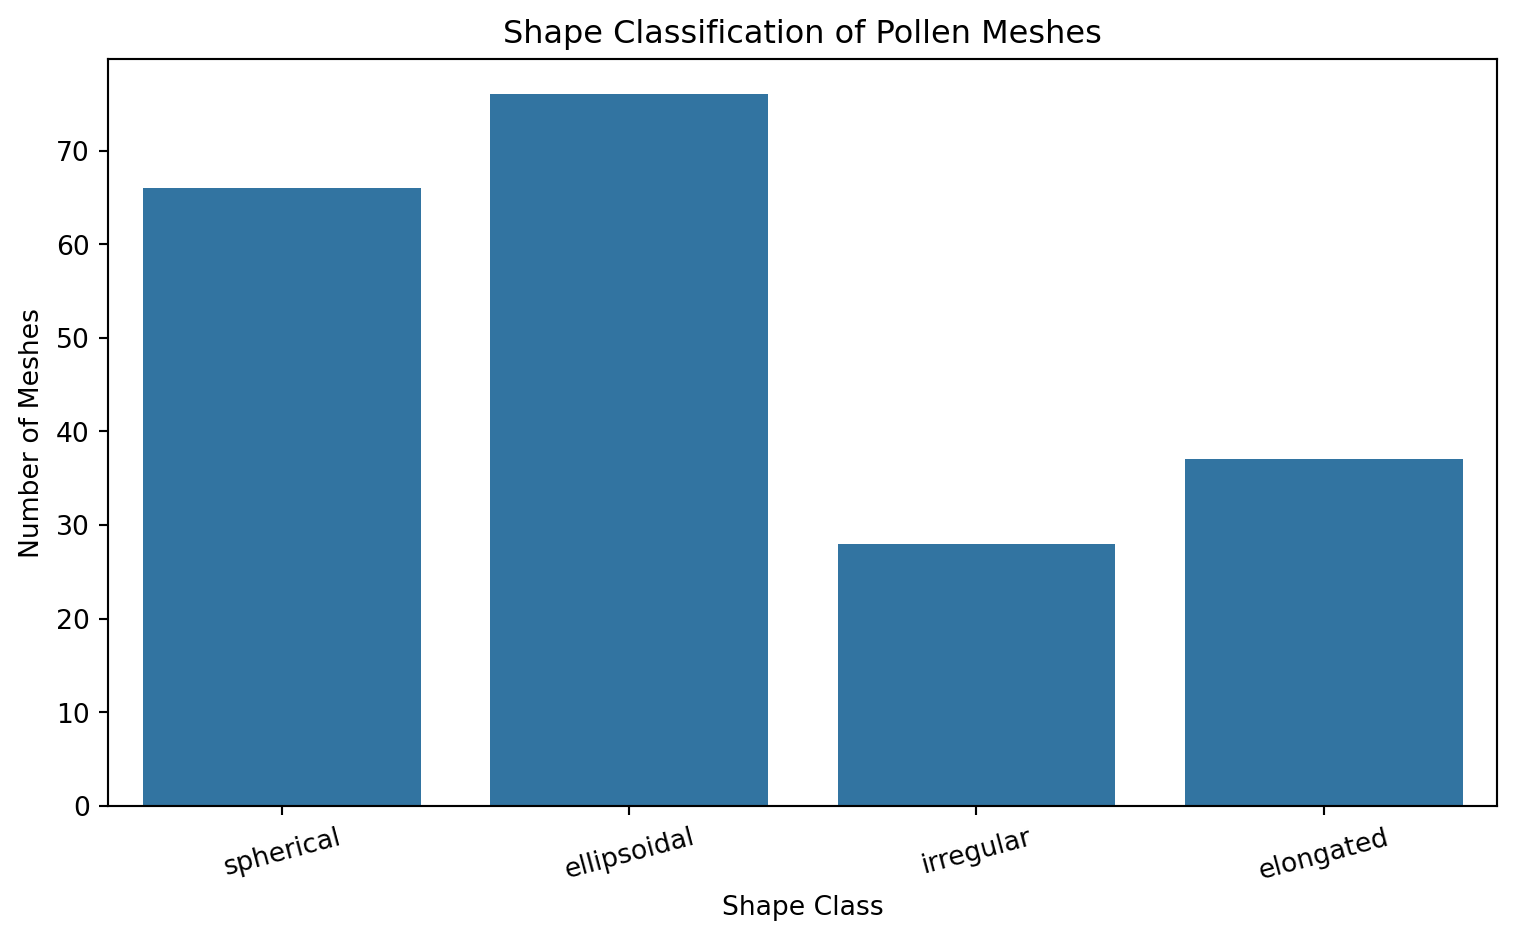

In [16]:
from collections import Counter

shape_counts = Counter(shape_labels)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(shape_counts.keys()), y=list(shape_counts.values()))
plt.title("Shape Classification of Pollen Meshes")
plt.ylabel("Number of Meshes")
plt.xlabel("Shape Class")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [17]:
def show_examples_for_shape(shape_name, n=3):
    matching = [fp for fp, lbl in zip(shape_file_paths, shape_labels) if lbl == shape_name]
    if not matching:
        print(f"No examples found for shape: {shape_name}")
        return
    sample = matching[:n]
    plotter = pv.Plotter(shape=(1, len(sample)))
    for i, path in enumerate(sample):
        mesh = pv.read(path)
        plotter.subplot(0, i)
        plotter.add_mesh(mesh, color="white")
    # Setze Kameraeinstellung nur einmal, falls das für alle Subplots gelten soll
    plotter.camera_position = 'xy'
    plotter.show(title=f"Examples of {shape_name} pollen")

# Show examples for a few shapes
for shape in ["spherical", "ellipsoidal", "elongated", "flattened", "irregular"]:
    show_examples_for_shape(shape)

Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1df22f7a650_7&reconnect=auto" class="pyvis…

Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1df27d4e710_8&reconnect=auto" class="pyvis…

Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1df27d6fd50_9&reconnect=auto" class="pyvis…

No examples found for shape: flattened


Widget(value='<iframe src="http://localhost:51163/index.html?ui=P_0x1df27e0e590_10&reconnect=auto" class="pyvi…

In [18]:
import pandas as pd

metrics = ["n_vertices", "n_faces", "avg_edge_length", "std_edge_length"]
mean_vals = [
    np.mean(mesh_stats["vertices_list"]),
    np.mean(mesh_stats["faces_list"]),
    np.mean(mesh_stats["edge_length_list"]),
    np.mean(mesh_stats["edge_length_std_list"]),
]
std_vals = [
    np.std(mesh_stats["vertices_list"]),
    np.std(mesh_stats["faces_list"]),
    np.std(mesh_stats["edge_length_list"]),
    np.std(mesh_stats["edge_length_std_list"]),
]

if mesh_stats["normal_mag_list"]:
    metrics.append("avg_normal_magnitude")
    mean_vals.append(np.mean(mesh_stats["normal_mag_list"]))
    std_vals.append(np.std(mesh_stats["normal_mag_list"]))

summary_df = pd.DataFrame({
    "Metric": metrics,
    "Mean": mean_vals,
    "Std Dev": std_vals
})

summary_df.style.format({"Mean": "{:.2f}", "Std Dev": "{:.2f}"})